In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as of
import cufflinks as cf
%matplotlib inline

In [29]:
of.init_notebook_mode(connected=True)
cf.go_offline()

In [30]:
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 15 # rcParams --> runtime configuration parameters
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [31]:
pwd

'F:\\'

In [32]:
cd F:\

F:\


In [33]:
data=pd.read_csv("world-happiness-report-2021.csv")
data.head()

,Country name,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [34]:
data_columns = ['Country name', 'Regional indicator', 'Happiness score', 'Logged GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices', 'Generosity','Perceptions of corruption']

In [35]:
data = data[data_columns].copy()

In [36]:
data.head()

,Country name,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [37]:
data.shape

(149, 9)

In [38]:
data.isnull().sum()

Country name                    0
Regional indicator              0
Happiness score                 0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Text(0.5, 1.0, 'Scatter Plot between Happiness score and GDP per capita')

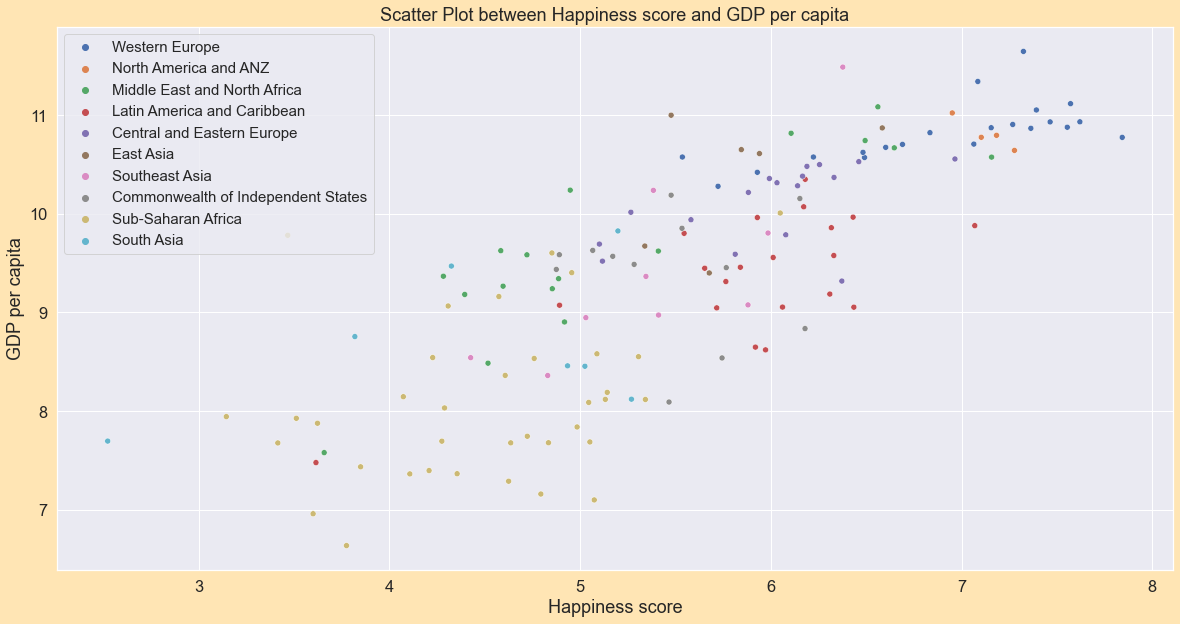

In [39]:
plt.figure(figsize = (20,10))
sns.set(font_scale=1.5)
sns.scatterplot(x="Happiness score", y="Logged GDP per capita",data=data,hue='Regional indicator')
plt.legend(loc= 'upper left', fontsize='15')
plt.xlabel('Happiness score')
plt.ylabel('GDP per capita')
plt.title("Scatter Plot between Happiness score and GDP per capita")

In [40]:
gdp_region = data.groupby('Regional indicator')['Logged GDP per capita'].sum()
gdp_region

Regional indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: Logged GDP per capita, dtype: float64

Text(0, 0.5, '')

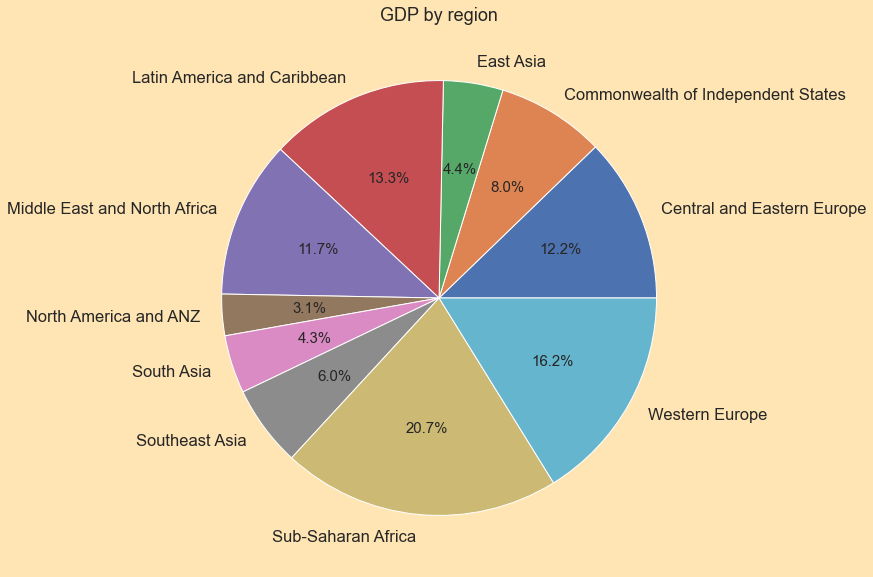

In [41]:
plt.rcParams['font.size'] = 15 # rcParams --> runtime configuration parameters
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'
plt.figure(figsize = (20,10))
gdp_region.plot.pie(autopct='%1.1f%%') #autopct='%1.1f%%' --> format used for percentage

plt.title("GDP by region")
plt.ylabel('')

In [42]:
# Counting total countries

total_countries = data.groupby('Regional indicator')['Country name'].count()
total_countries

Regional indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: Country name, dtype: int64

In [43]:
dat = data.corr()
dat

,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Happiness score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


<AxesSubplot:>

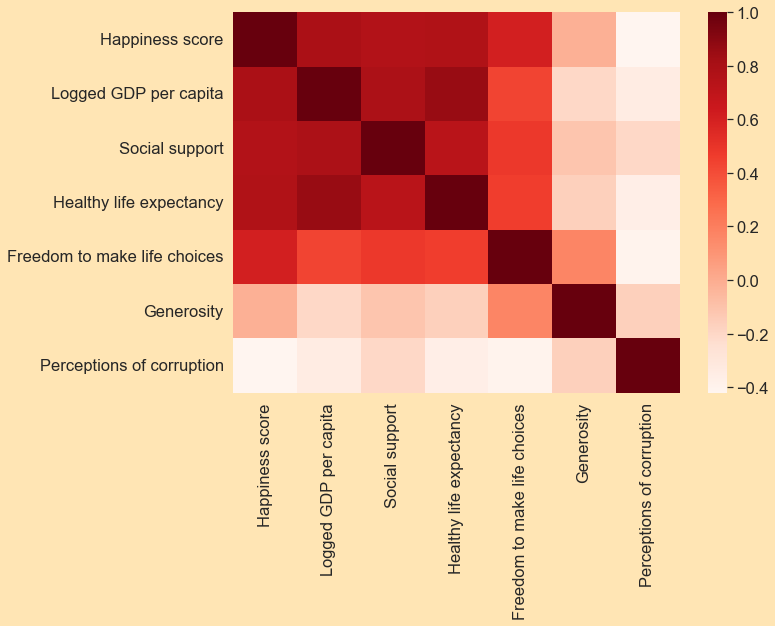

In [44]:
sns.heatmap(dat,cmap='Reds') #using this we can find the corelation between each columns

In [45]:
corruption = data.groupby('Regional indicator')['Perceptions of corruption'].mean()
corruption
corr = pd.DataFrame(corruption)
corr

,Perceptions of corruption
Regional indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


In [46]:
corr.iplot(kind='bar', xTitle = 'Regions', yTitle = 'Corruption Index', title = 'Perception of corruption in various Regions', colorscale = 'paired')

In [20]:
top_10 = data.head(10)
bottom_10 = data.tail(10)
top_10

,Country name,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338
5,Norway,Western Europe,7.392,11.053,0.954,73.3,0.960,0.093,0.270
6,Sweden,Western Europe,7.363,10.867,0.934,72.7,0.945,0.086,0.237
7,Luxembourg,Western Europe,7.324,11.647,0.908,72.6,0.907,-0.034,0.386
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.4,0.929,0.134,0.242
9,Austria,Western Europe,7.268,10.906,0.934,73.3,0.908,0.042,0.481


<AxesSubplot:title={'center':'Life expectency of top 10 least happiest countries'}>

<Figure size 720x504 with 0 Axes>

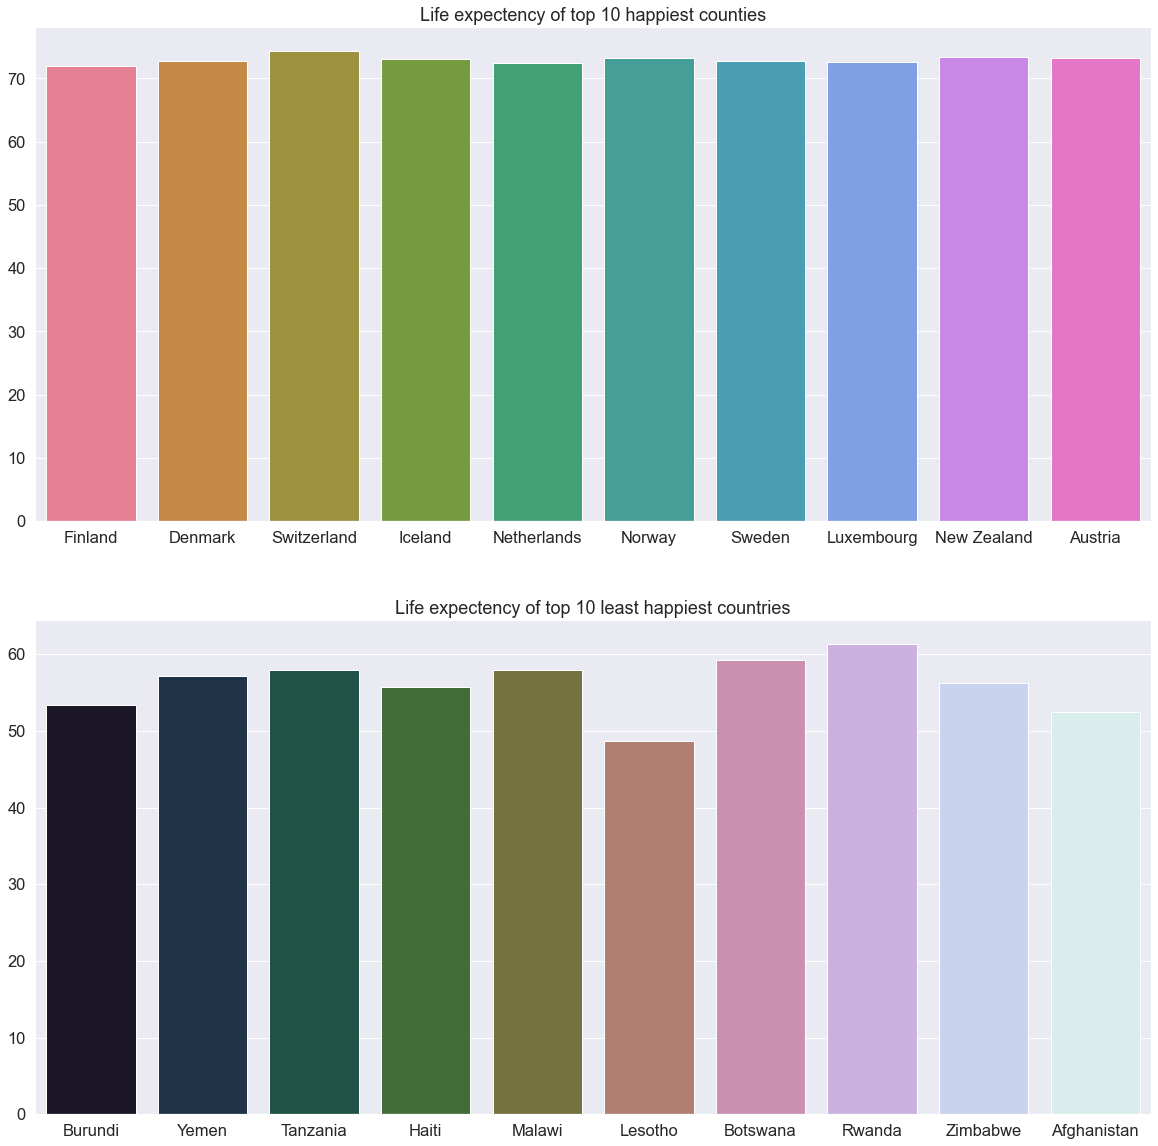

In [21]:
sns.set(font_scale=1.5)
plt.tight_layout()
labels_top = list(top_10['Country name'])
labels_bottom = list(bottom_10['Country name'])
happy_top = list(top_10['Healthy life expectancy'])
bottom_top = list(bottom_10['Healthy life expectancy'])
fig, axes = plt.subplots(2,1, figsize=(20,20))

axes[0].set_title("Life expectency of top 10 happiest counties")
axes[1].set_title("Life expectency of top 10 least happiest countries")
#axes[0].set_xticklabels(labels_top, rotation = 45, ha='right') used to rotate the labels
#axes[1].set_xticklabels(labels_bottom, rotation = 45, ha='right')
sns.barplot(x=labels_top, y=happy_top, ax=axes[0],palette='husl')
sns.barplot(x=labels_bottom, y=bottom_top, ax=axes[1],palette='cubehelix')

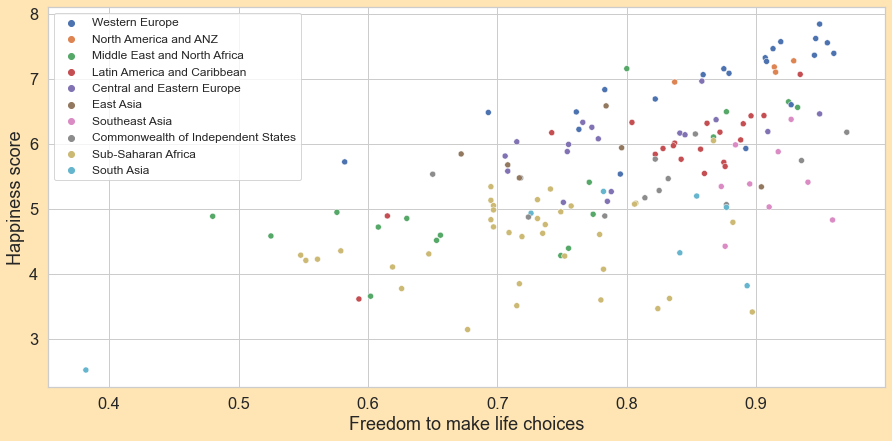

In [22]:
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 15 # rcParams --> runtime configuration parameters
plt.rcParams['figure.facecolor'] = '#FFE5B4'
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x="Freedom to make life choices",y="Happiness score", hue ="Regional indicator",data=data)
plt.legend(loc= 'upper left', fontsize='12')

In [23]:
low_corrupted_country = data.sort_values(by = 'Perceptions of corruption',ascending=True).head(10)
high_corrupted_country = data.sort_values(by = 'Perceptions of corruption',ascending=False).head(10)

In [24]:
low_corrupted_country

,Country name,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
31,Singapore,Southeast Asia,6.377,11.488,0.915,76.953,0.927,-0.018,0.082
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
6,Sweden,Western Europe,7.363,10.867,0.934,72.700,0.945,0.086,0.237
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.400,0.929,0.134,0.242
5,Norway,Western Europe,7.392,11.053,0.954,73.300,0.960,0.093,0.270
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
14,Ireland,Western Europe,7.085,11.342,0.947,72.400,0.879,0.077,0.363


In [25]:
high_corrupted_country

,Country name,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
59,Croatia,Central and Eastern Europe,5.882,10.217,0.924,70.799,0.754,-0.118,0.939
45,Romania,Central and Eastern Europe,6.140,10.284,0.832,67.355,0.845,-0.219,0.938
87,Bulgaria,Central and Eastern Europe,5.266,10.016,0.931,67.000,0.788,-0.096,0.932
63,Bosnia and Herzegovina,Central and Eastern Europe,5.813,9.590,0.870,68.098,0.706,0.113,0.931
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924
109,Ukraine,Commonwealth of Independent States,4.875,9.436,0.888,64.902,0.724,-0.011,0.924
64,Moldova,Commonwealth of Independent States,5.766,9.454,0.857,65.699,0.822,-0.079,0.918
32,Kosovo,Central and Eastern Europe,6.372,9.318,0.821,63.813,0.869,0.257,0.917
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
33,Slovakia,Central and Eastern Europe,6.331,10.369,0.936,69.201,0.766,-0.124,0.911


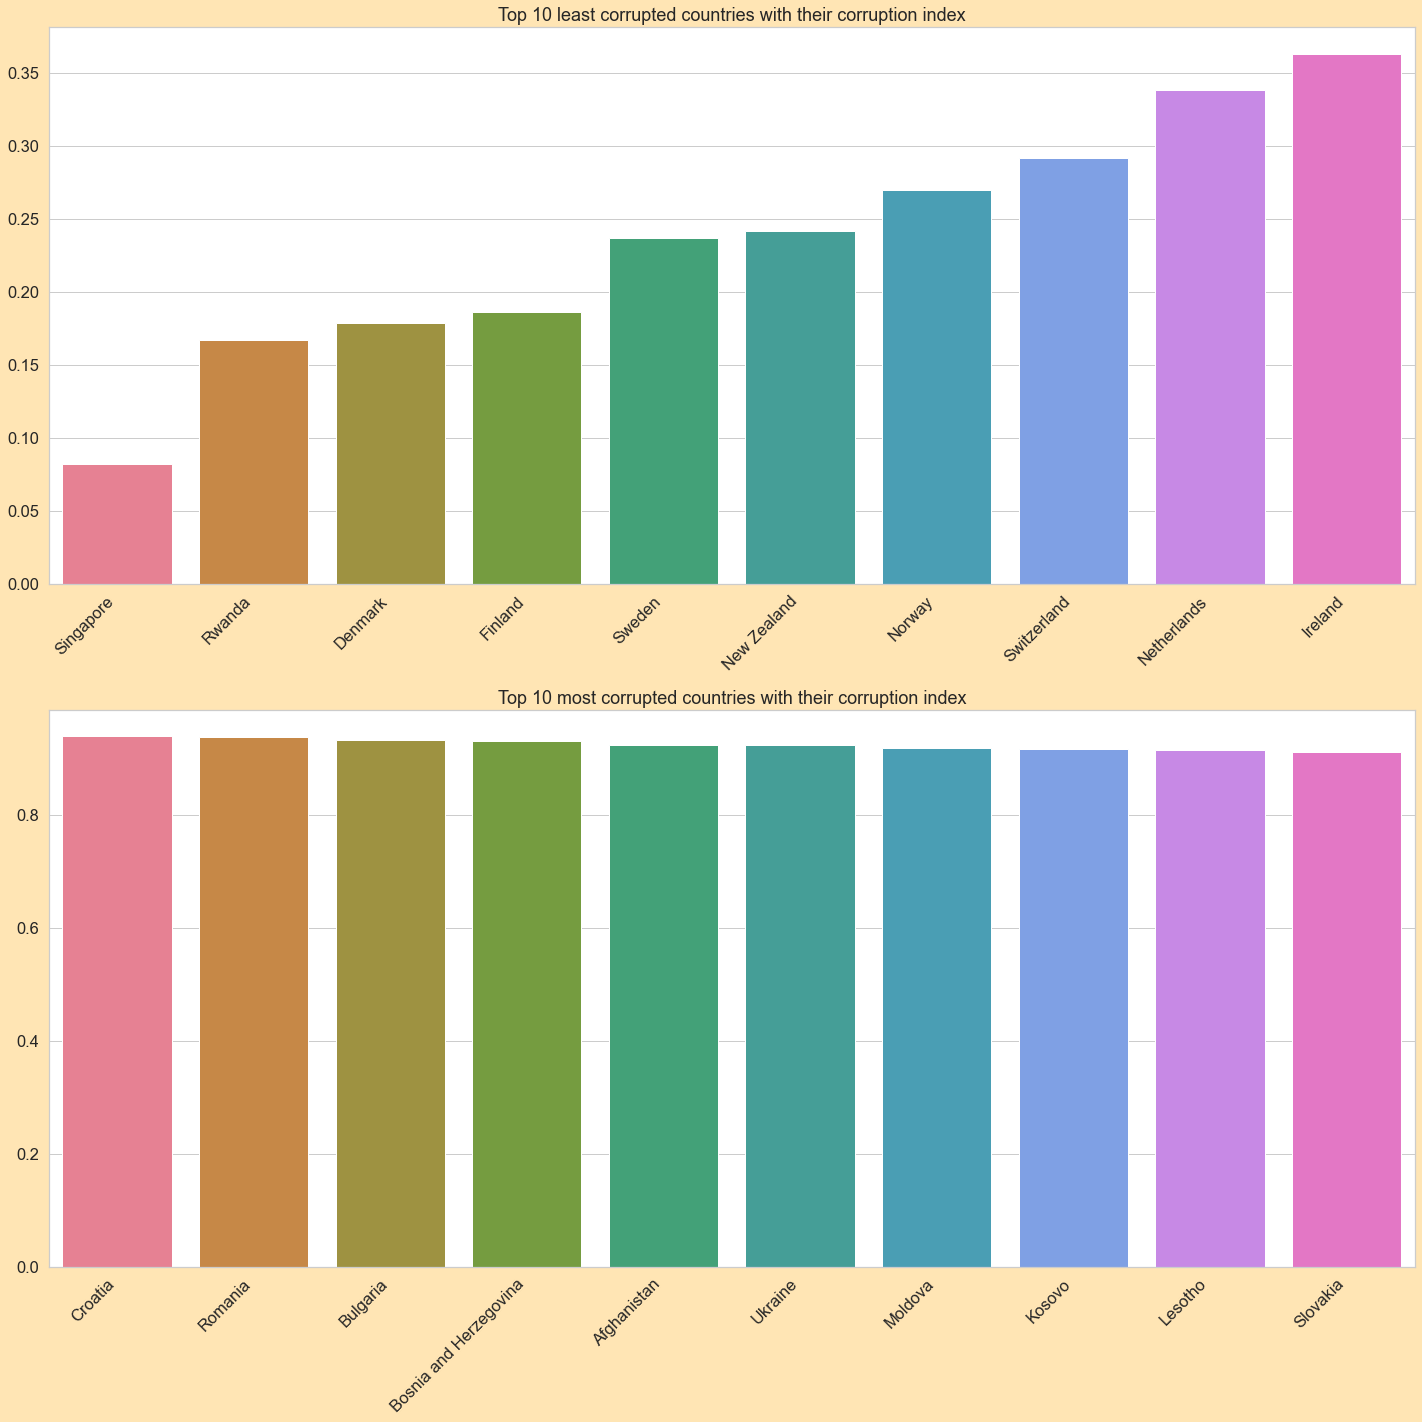

In [26]:

fig, axes = plt.subplots(2,1, figsize=(20,20))
label1 = list(low_corrupted_country['Country name'])
label2 = list(high_corrupted_country['Country name'])
y1 = list(low_corrupted_country['Perceptions of corruption'])
y2 = list(high_corrupted_country['Perceptions of corruption'])
axes[0].set_title("Top 10 least corrupted countries with their corruption index")
axes[1].set_title("Top 10 most corrupted countries with their corruption index")
sns.barplot(x=label1,y=y1, ax=axes[0],palette='husl')
sns.barplot(x=label2,y=y2, ax=axes[1],palette='husl')
axes[0].set_xticklabels(label1, rotation = 45, ha='right') 
axes[1].set_xticklabels(label2, rotation = 45, ha='right')
plt.tight_layout()

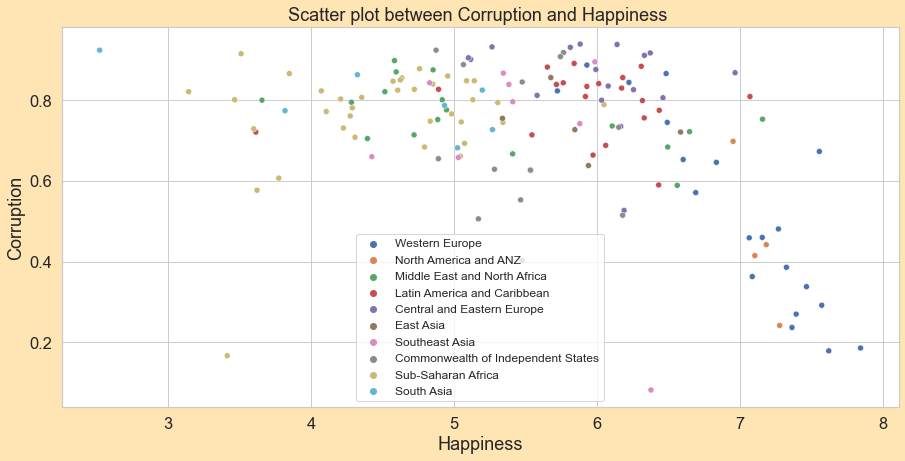

In [27]:
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 15 # rcParams --> runtime configuration parameters
plt.rcParams['figure.facecolor'] = '#FFE5B4'
plt.rcParams['figure.figsize'] = (15,7)
plt.xlabel('Happiness')
plt.ylabel("Corruption")
plt.title("Scatter plot between Corruption and Happiness ")
sns.scatterplot(x="Happiness score",y="Perceptions of corruption", hue ="Regional indicator",data=data)
plt.legend(loc= 8, fontsize='12')